# Task 3: Implementing a neural network utilizing Runge-Kutta method

In [1]:
from sw.ERKNN import *
from sw.dataformating import get_train_and_val_data
from sw.simulation import simulateRandomERK, gravityCenterERK
from sw.plotting import *

from torch.utils.data import DataLoader
DATA_FILEPATH = "datasets/postvis.csv"
%load_ext autoreload
%autoreload 2

## Hyperparameters:

In [2]:
LR = 1e-4 #learning rate
BATCHES = 32
EPOCHS = 5

INPUT_SIZE = 2
OUTPUT_SIZE = 2
DEPTH = 100

## Formating data for input:

In [3]:
train_percent = 80
train_data, val_data = get_train_and_val_data(DATA_FILEPATH,train_percent)

train_set = DataLoader(train_data,batch_size=BATCHES,shuffle=True)
val_set = DataLoader(val_data,shuffle=True)

## Training NN with ERK template:

In [4]:
integrator_dict = {"a": [0,1/2,1/2,1],"b":[1/6,1/3,1/3,1/6]} # most common ERK4 method
erknn = ERKNN(INPUT_SIZE,DEPTH,OUTPUT_SIZE,integrator_dict)
loss_data = erk_training(erknn,LR,EPOCHS,train_set)
val_loss, val_step = erk_validating(erknn,LR,train_set,val_set)
print(val_loss, " ", val_step)

tensor(0.0565, grad_fn=<DivBackward0>)   311


## Simulate ERK

In [5]:
num_ped = 10
sim_steps = 500
dt = 0.1

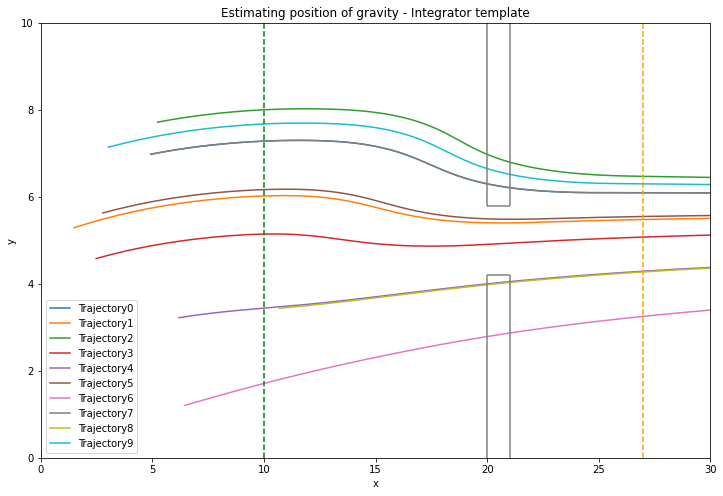

In [6]:
traj = simulateRandomERK(erknn,num_ped,sim_steps,dt,DATA_FILEPATH)
plot_traj(num_ped,traj)

## Estimating center of gravity for all pedestrians:

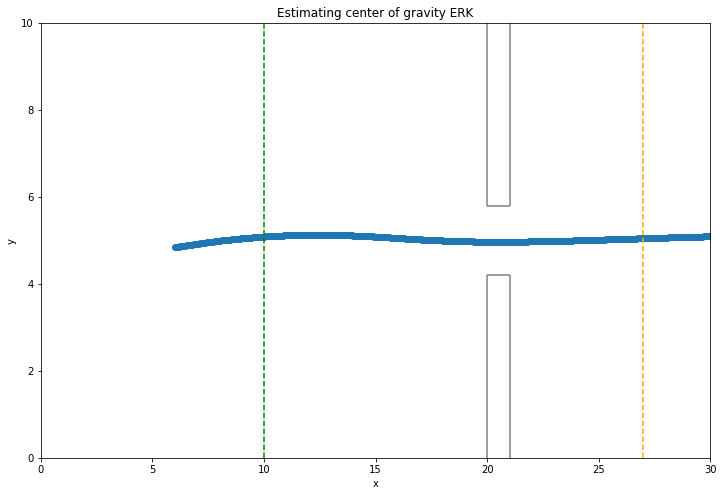

In [10]:
traj = gravityCenterERK(erknn,sim_steps,dt,DATA_FILEPATH)
plot_scatter(traj,lab="Center of gravity for all pedestrains",title="Estimating center of gravity ERK")

# Phase portrait

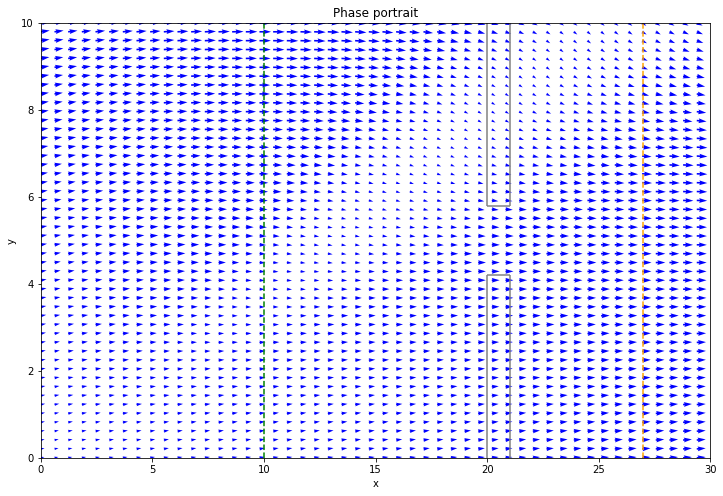

In [11]:
phase_portraitERK(erknn)